In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ds_salaries.csv")

In [6]:
print("Wiew the start of the Dataframe")
print(df.head())


Wiew the start of the Dataframe
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0

In [7]:
print("check if there are missing values")
df.isnull().sum()

check if there are missing values


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

how is the total payment devided among the experience levels


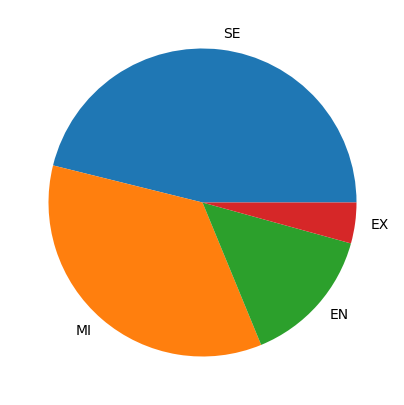

In [12]:
plt.figure(figsize=(5, 5))
sum_in_each_experience_level=df["experience_level"].value_counts()
plt.pie(sum_in_each_experience_level,labels=sum_in_each_experience_level.index)
print("how is the total payment devided among the experience levels")
plt.show()

In [14]:
job_title_counts = df['job_title'].value_counts()
job_title_counts

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

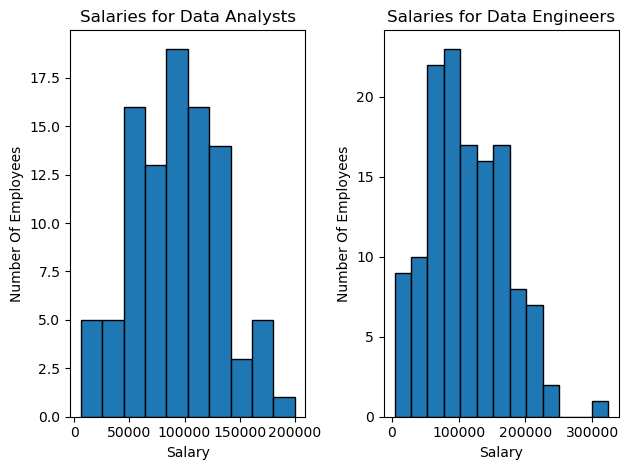

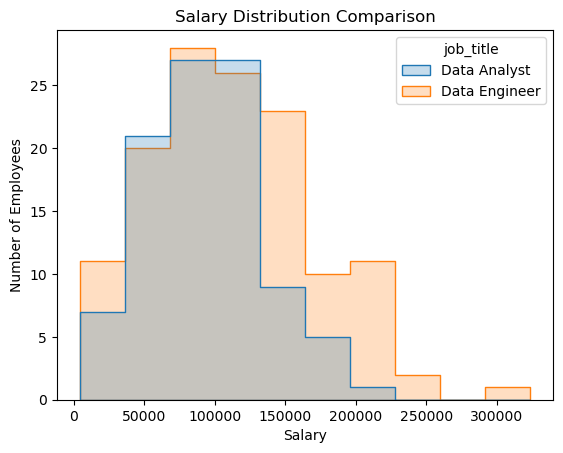

In [30]:
plt.subplot(1, 2, 1)
data_analyst_df = df[df['job_title'] == 'Data Analyst']
plt.hist(data_analyst_df['salary_in_usd'], bins=round(len(data_analyst_df)/10), edgecolor='black')
plt.title('Salaries for Data Analysts')
plt.xlabel('Salary')
plt.ylabel('Number Of Employees')

plt.subplot(1, 2, 2)
data_engineer_df = df[df['job_title'] == 'Data Engineer']
plt.hist(data_engineer_df['salary_in_usd'], bins=round(len(data_engineer_df)/10), edgecolor='black')
plt.title('Salaries for Data Engineers')
plt.xlabel('Salary')
plt.ylabel('Number Of Employees')

plt.tight_layout()
plt.show()

filtered_df = df[df['job_title'].isin(['Data Analyst', 'Data Engineer'])]

sns.histplot(data=filtered_df, x='salary_in_usd', hue='job_title', bins=10, element='step')
plt.title('Salary Distribution Comparison')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()







The range of Salaries for German Citizens, for each Experience Level


<Axes: xlabel='experience_level', ylabel='salary'>

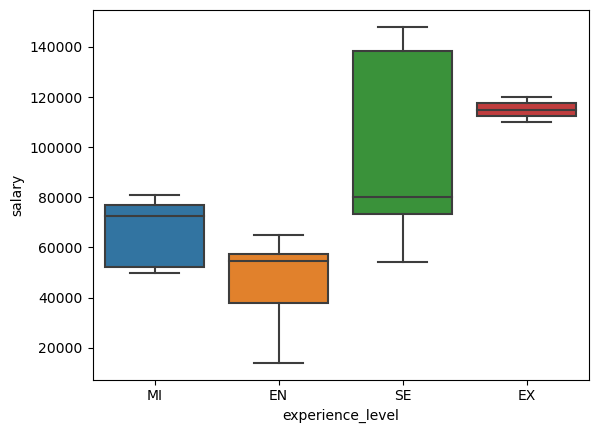

In [45]:
print("The range of Salaries for German Citizens, for each Experience Level")
filtered_df2 = df[df['employee_residence'] == "DE"]
sns.boxplot(x='experience_level', y='salary', data=filtered_df2)


C:\Users\Aster\AppData\Local\Temp\ipykernel_10792\63690133.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = entry_df.groupby(['job_title']).mean()['salary_in_usd']/12


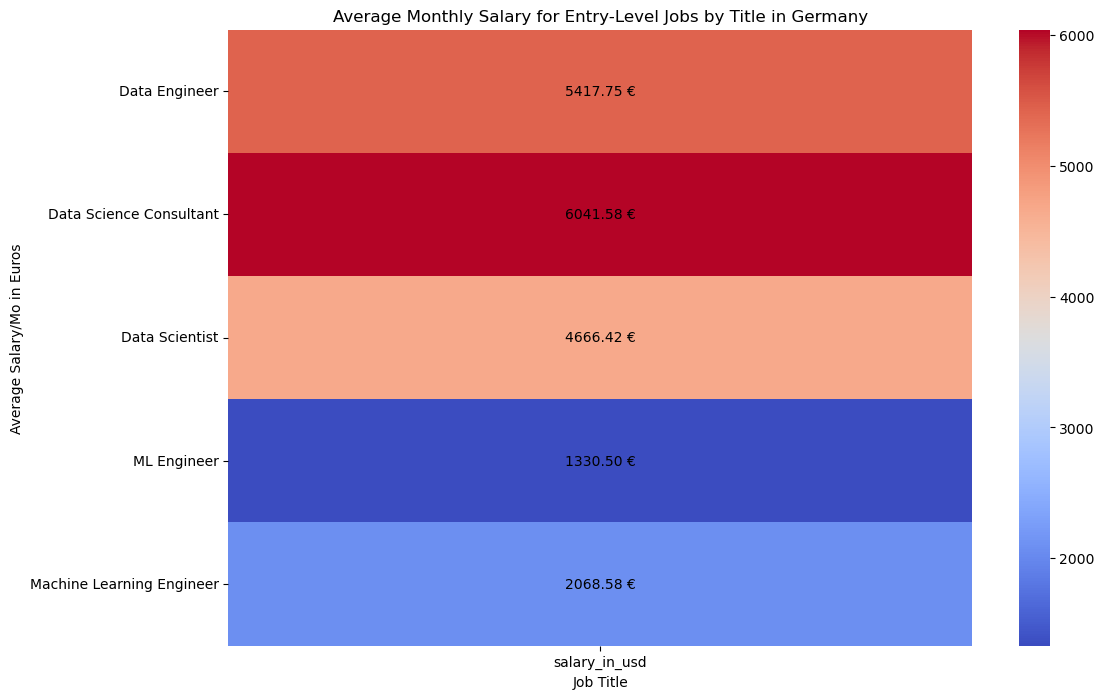

In [70]:
entry_df = df[(df["experience_level"] == "EN") & (df["employee_residence"] == "DE")]
grouped_df = entry_df.groupby(['job_title']).mean()['salary_in_usd']/12

grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.rename(columns={'salary': 'Average Salary'})

plt.figure(figsize=(12, 8))
ax = sns.heatmap(grouped_df.set_index('job_title'), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"visible": False}) # make default annotations invisible

for (i, j), value in np.ndenumerate(grouped_df.set_index('job_title').values):
    ax.text(j + 0.5, i + 0.5, f"{value:.2f} €", ha='center', va='center')

plt.title('Average Monthly Salary for Entry-Level Jobs by Title in Germany')
plt.xlabel('Job Title')
plt.ylabel('Average Salary/Mo in Euros')

plt.show()
